In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize

In [26]:
file_path = "/Users/flint/Data/recipe/italian/gz_recipe.csv"
R = pd.read_csv(filepath_or_buffer=file_path, index_col=0)
data = pd.read_csv("/Users/flint/Data/recipe/italian/tfidf.csv", index_col=0) 

In [27]:
R.head(2)

,Nome,Categoria,Link,Persone/Pezzi,Ingredienti,Steps
0,Tiramisù,Dolci,https://ricette.giallozafferano.it/Tiramisu.html,8,"[['Mascarpone', '750g'], ['Uova', '260g'], ['S...",Per preparare il tiramisù preparate il caffé c...
1,Cookies,Dolci,https://ricette.giallozafferano.it/Cookies.html,12,"[['Farina 00', '195g'], ['Burro', '100g'], ['B...","Per preparare i cookies, assicuratevi che il b..."


In [31]:
data.columns = R['Nome'].values
data = data.T 
data.head(2)

,tiramisù,\n,mascarpone,",",uova,savoiardi,zucchero,caffè,cacao,amaro,...,spegnetela,integraleaggiungeto,bennettons,ambientare,infondere,daiquiri,dela,bicchieri,raffreddira,emulsionatere
Tiramisù,0.048626,0.0,0.04976,0.000030,0.003557,0.01639,0.009726,0.036545,0.018727,0.018428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cookies,0.000000,0.0,0.00000,0.000039,0.007136,0.00000,0.019513,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Reduce dimensionality

In [32]:
X2 = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(data) 
Xs = pd.DataFrame(X2, columns=['X', 'Y'])
Xs['category'] = R['Categoria']
Xs.head()

,X,Y,category
0,-72.992874,1.630094,Dolci
1,-56.143970,21.264736,Dolci
2,-68.278648,-42.168945,Dolci
3,-74.377174,2.099731,Dolci
4,-13.712877,15.374280,Dolci


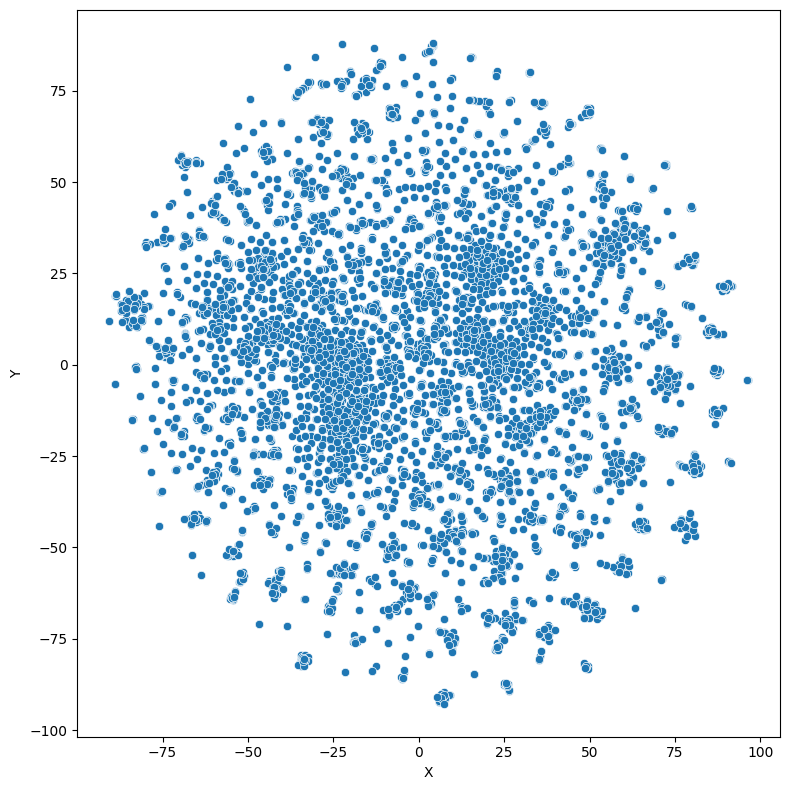

In [33]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=Xs, x="X", y="Y", ax=ax)
plt.tight_layout()
plt.show()

## KMeans

In [36]:
k = 10
centroid_ids = np.random.choice(Xs.index.values, size=10, replace=False)
centroids = Xs.loc[centroid_ids]
centroids 

,X,Y,category
4922,56.217476,47.144104,Antipasti
5416,35.937244,14.235108,Primi piatti
1906,-17.022507,-39.901417,Secondi piatti
5054,0.760240,-5.344607,Primi piatti
4786,50.222538,69.074661,Secondi piatti
1472,-17.381693,15.614225,Primi piatti
1743,-76.442589,12.003220,Dolci
2551,8.752110,-45.741688,Primi piatti
3382,54.597954,36.878971,Secondi piatti
1358,63.503765,-25.328379,Insalate


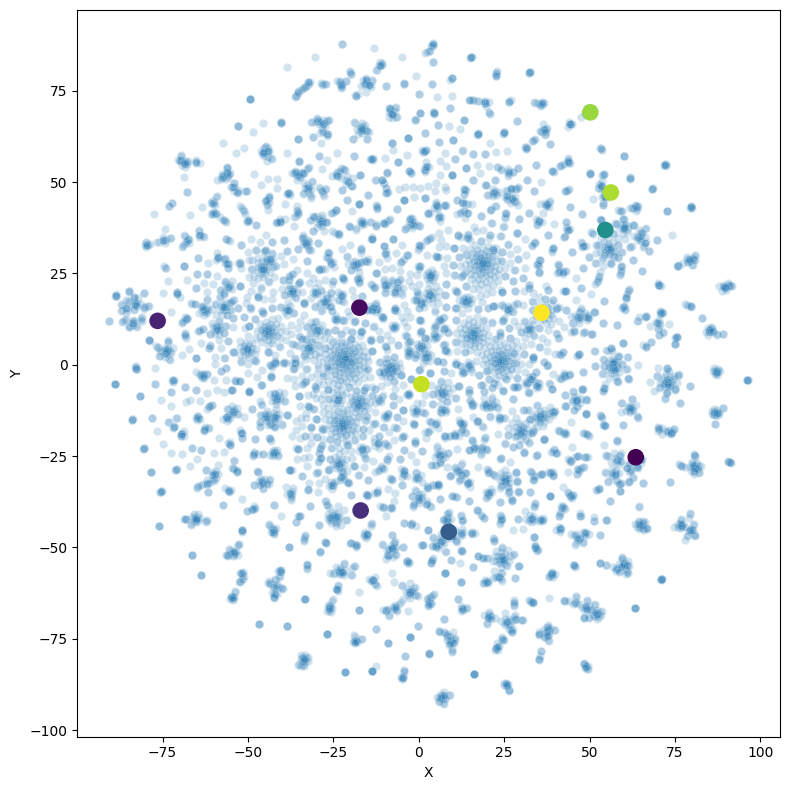

In [62]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=Xs, x="X", y="Y", ax=ax, alpha=0.2)
ax.scatter(x=centroids['X'], y=centroids['Y'], c=centroids.index, s=120)
plt.tight_layout()
plt.show()

In [40]:
from sklearn.metrics.pairwise import euclidean_distances

In [66]:
distance = euclidean_distances(centroids[['X', 'Y']], Xs[['X', 'Y']])
assignment = np.argmin(distance.T, axis=1)

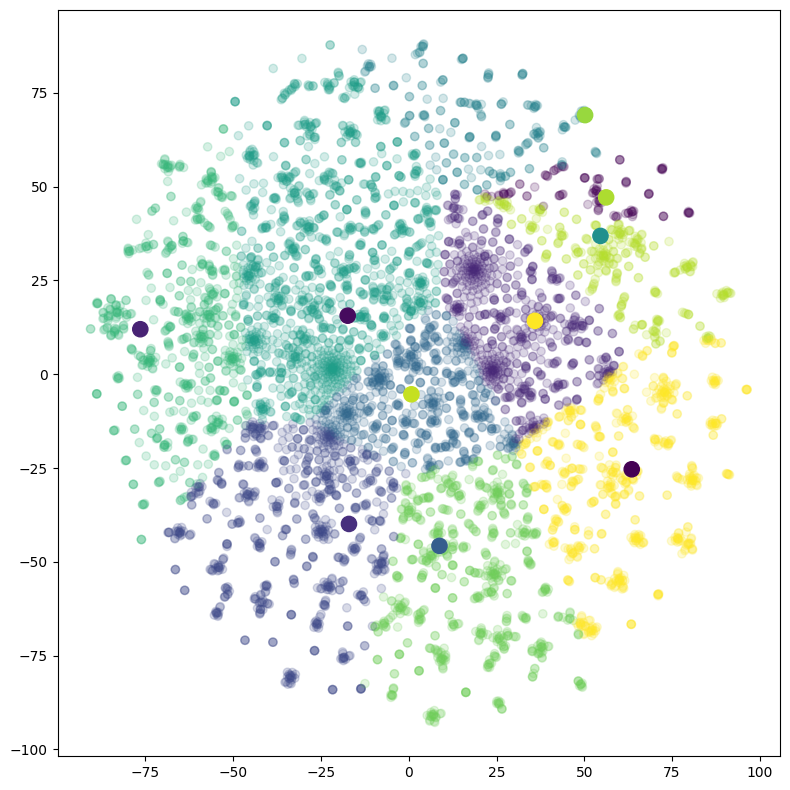

In [68]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x=Xs['X'], y=Xs['Y'], alpha=0.2, c=assignment)
ax.scatter(x=centroids['X'], y=centroids['Y'], c=centroids.index, s=120)
plt.tight_layout()
plt.show()

In [69]:
from sklearn.cluster import KMeans

In [70]:
km = KMeans(n_clusters=10)
assignment = km.fit_predict(Xs[['X', 'Y']])

/Users/flint/.pyenv/versions/3.9.17/envs/nlp/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [71]:
assignment 

array([0, 0, 3, ..., 0, 5, 5], dtype=int32)

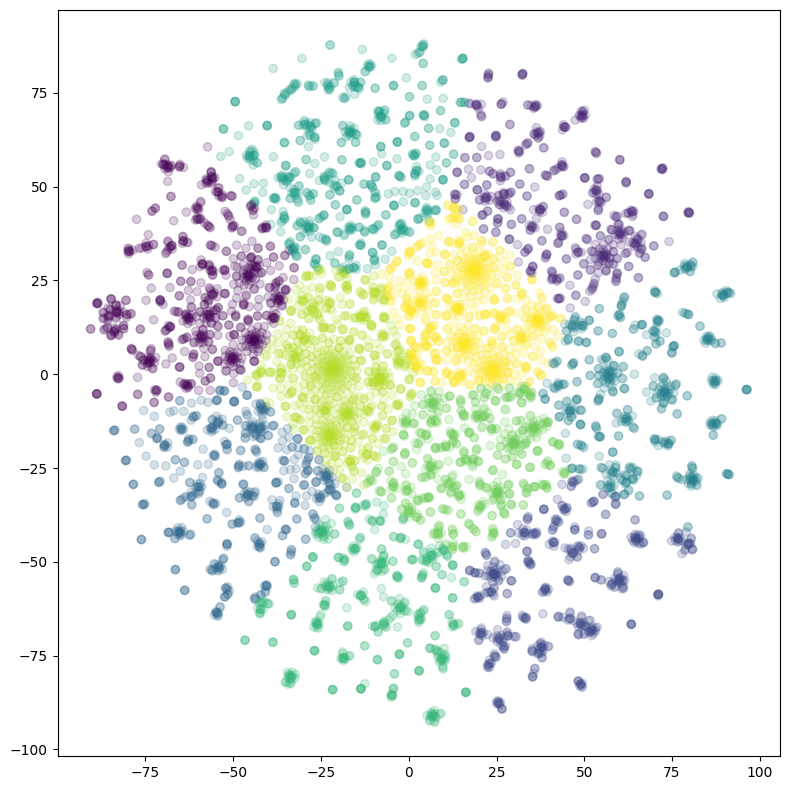

In [72]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x=Xs['X'], y=Xs['Y'], alpha=0.2, c=assignment)
plt.tight_layout()
plt.show()

In [78]:
cluster_0 = [i for i, x in enumerate(assignment) if x == 2]

In [79]:
R.iloc[cluster_0]

,Nome,Categoria,Link,Persone/Pezzi,Ingredienti,Steps
13,Spaghetti alle vongole,Primi piatti,https://ricette.giallozafferano.it/Spaghetti-a...,4,"[['Spaghetti', '320g'], ['Vongole', '1kg'], ['...","Per preparare gli spaghetti alle vongole, comi..."
24,Capesante gratinate,Antipasti,https://ricette.giallozafferano.it/Capesante-g...,4,"[['Capesante', '8'], ['Pane', '100g'], ['Pepe ...","Per realizzare le capesante gratinate, iniziat..."
43,Insalata tiepida di polpo e patate,Secondi piatti,https://ricette.giallozafferano.it/Insalata-ti...,4,"[['Polpo', '1kg'], ['Patate', '1kg'], ['Alloro...",Per preparare l’insalata tiepida di polpo e pa...
50,Polpettine di tonno e ricotta,Secondi piatti,https://ricette.giallozafferano.it/Polpettine-...,20,"[[""Tonno sott'olio"", '230g'], ['Ricotta vaccin...",Per preparare le polpettine di tonno e ricotta...
58,Spaghetti allo scoglio,Primi piatti,https://ricette.giallozafferano.it/Spaghetti-a...,4,"[['Spaghetti', '320g'], ['Cozze', '1kg'], ['Vo...",Per preparare gli spaghetti allo scoglio comin...
...,...,...,...,...,...,...
5898,Friselle con verdure e salsa al taleggio,Antipasti,https://ricette.giallozafferano.it/Friselle-co...,4,"[['Freselle', '4'], ['Fagiolini', '100g'], ['R...",Per preparare le friselle con verdure e salsa ...
5908,Minestra ai tre pomodori,Primi piatti,https://ricette.giallozafferano.it/Minestra-ai...,4,[['Chicchi di farina di legumi (lenticchie ros...,"Per preparare la minestra ai tre pomodori, ini..."
5917,Spianatine con julienne di verdure e Asiago,Antipasti,https://ricette.giallozafferano.it/Spianatine-...,12,"[['La Bottega di Olivia&Marino', '12'], ['Caro...",Per preparare le spianatine di verdure julienn...
5921,Schiacciate con insalata di patate all'Asiago,Antipasti,https://ricette.giallozafferano.it/Schiacciate...,12,"[['La Bottega di Olivia&Marino', '12'], ['Pata...",Per preparare le schiacciate con insalata di p...
